In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('real_estate_data.csv',delimiter='	')

In [17]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Графически отображаем исходные данные

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

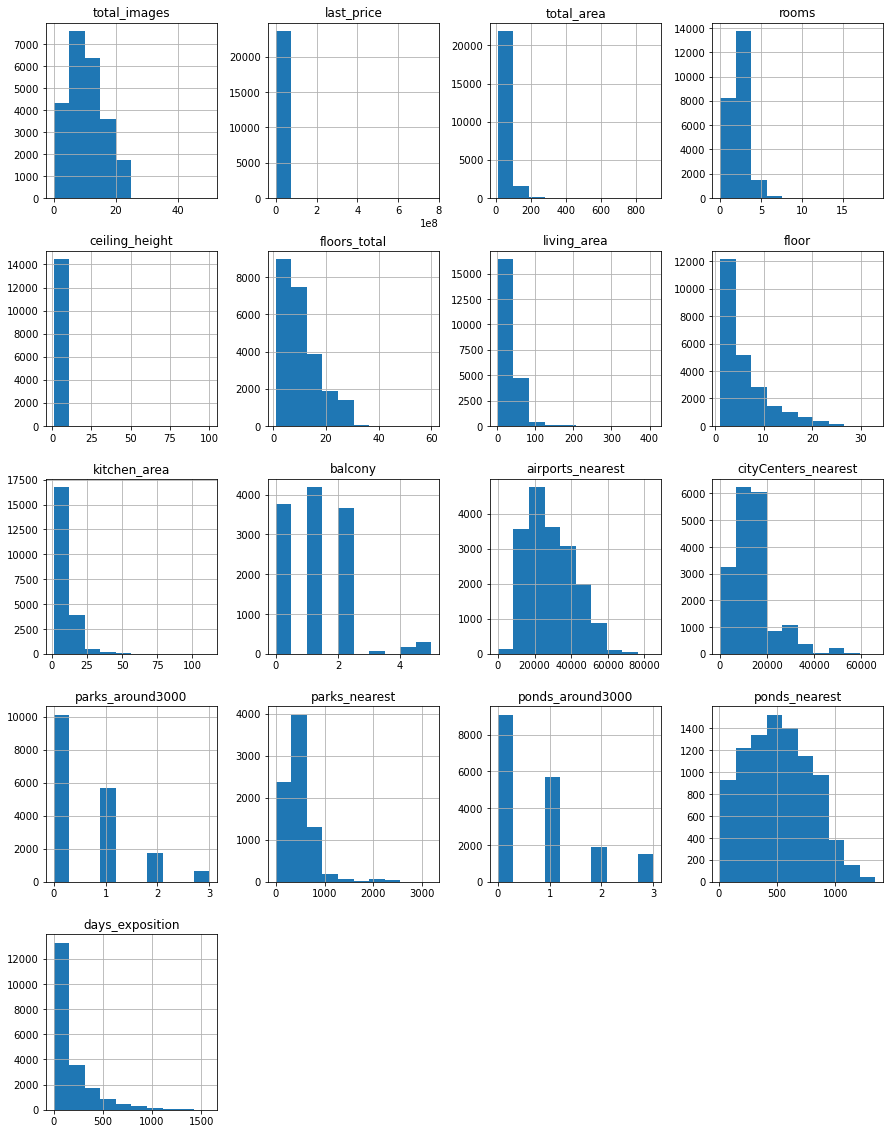

In [12]:
data.hist(figsize=(15,20))

Изучим на количество пропусков

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [23]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


### Выведем столбцы

In [25]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [29]:
#Название столбца cityCenters_nearest нужно привожу к нижнему регистру
data.rename(columns = {'cityCenters_nearest': 'citycenters_nearest'}, inplace = True)
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [31]:
# ищу дупликаты
data.duplicated().sum()

0

дупликтов не нашлось,работаем по очередно со столбцами

In [32]:
#ceiling_height — высота потолков (м)
data['ceiling_height'].isna().sum()

9195

In [35]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

##### высота потолков больше 15 метров маловероятна, логично предположить, что были допущены ошибки, заменяем значения

In [117]:
z1 = data[data['ceiling_height']>15]['ceiling_height'].unique()

In [135]:
print(z1.sort())

None


In [136]:
z1 = z1.tolist()

AttributeError: 'list' object has no attribute 'tolist'

In [137]:
z2 = [(round((i/10),2)) for i in z1]

In [138]:
dict1 = dict(zip(z1, z2))

In [139]:
dict1

{20.0: 2.0,
 22.6: 2.26,
 24.0: 2.4,
 25.0: 2.5,
 26.0: 2.6,
 27.0: 2.7,
 27.5: 2.75,
 32.0: 3.2,
 100.0: 10.0}

In [140]:
data['ceiling_height'] = data['ceiling_height'].replace(dict1)

<AxesSubplot:ylabel='Frequency'>

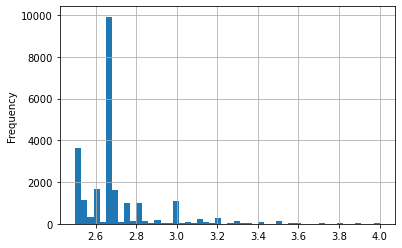

In [141]:
data['ceiling_height'].sort_values().plot(y='ceiling_height',kind='hist',bins=50,range=(2.5,4), grid = True)

In [142]:
data['ceiling_height'].fillna(data['ceiling_height'].median(),inplace=True)

In [129]:
data['ceiling_height'].isna().sum()

0

In [161]:
data['floors_total'].isna().sum()

0

In [150]:
round(data['floors_total'].describe(),2)

count    23613.00
mean        10.67
std          6.60
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

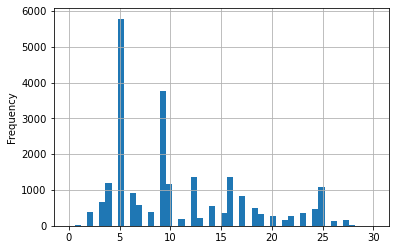

In [153]:
data['floors_total'].sort_values().plot(y='floors_total',bins=50,kind='hist',range=(0,30),grid=True)

In [159]:
round(data['floors_total'].isna().sum()*100/len(data),2)

0.36

Процент пропущенных значений в колонке с этажами-0.4 %.Доля пропусков менее 1%,так как эти пропуски не имеют решающего статистического значения,я принял решение удалить эти данные

In [160]:
data.dropna(subset=['floors_total'],inplace=True)

In [162]:
data['floors_total'].isna().sum()

0

In [163]:
display(data['living_area'].isna().sum())
data['kitchen_area'].isna().sum()

1870

2231

In [166]:
#Процент пропущенных значений cтолбца с жилой площадью
round(data['living_area'].isnull().sum() * 100 / len(data), 1)

7.9

In [167]:
#Процент пропущенных значений столбца с площадью кухни
round(data['kitchen_area'].isnull().sum() * 100 / len(data), 1)

9.4

Процент пропущенных значений в столбцах с жилой площадью и площадью кухни превышает допустимый в 5%,оставим их, как они есть

Количество балконов привожу к  int,заменив все пустые значения на 0

In [169]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [174]:
data['locality_name'].isna().sum()

0

Удаляю квартиры без адресв

In [175]:
data.dropna(subset=['locality_name'],inplace=True)

In [177]:
data['locality_name'].value_counts()

Санкт-Петербург                        15651
посёлок Мурино                           520
посёлок Шушары                           439
Всеволожск                               398
Пушкин                                   369
                                       ...  
поселок Почап                              1
деревня Лупполово                          1
поселок городского типа Кондратьево        1
деревня Пикколово                          1
деревня Русско                             1
Name: locality_name, Length: 364, dtype: int64

In [179]:
data['locality_name'] = data['locality_name'].str.replace("посёлок", "поселок")

In [180]:
data['locality_name'].isna().sum()

0

Количество парков и водоемов в радиусе 3000метров привожу к типу int,аменив все пустые значения на 0

In [190]:
data['parks_around3000'].isna().sum()

0

In [189]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)

In [193]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

In [194]:
data['ponds_around3000'].isna().sum()

0

Привожу к типу дата столбец с датой первого дня размещения объявления

In [199]:
#Если при чтении файлауказать параметр:
#  parse_dates: parse_dates=['first_day_exposition'].
#Пндас автоматически переведёт столбец или список столбцов в даты.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')